In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'

valid_path='Dataset/Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\WithMask', 'Dataset/Train\\WithoutMask']

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 172 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\archi\Anacondaa\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
6/6 [==============================] - 25s 3s/step - loss: 5.3786 - accuracy: 0.4767 - val_loss: 3.1520 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 17s 3s/step - loss: 2.4652 - accuracy: 0.5058 - val_loss: 1.2270 - val_accuracy: 0.5500
Epoch 3/20
6/6 [==============================] - 16s 3s/step - loss: 1.6084 - accuracy: 0.5640 - val_loss: 2.8676 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 0.9789 - accuracy: 0.6453 - val_loss: 2.3974 - val_accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 17s 3s/step - loss: 0.8825 - accuracy: 0.6686 - val_loss: 1.7355 - val_accuracy: 0.6000
Epoch 6/20
6/6 [==============================] - 16s 3s/step - loss: 0.7381 - accuracy: 0.7035 - val_loss: 1.8144 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 16s 3s/step - loss: 0.5551 - accuracy: 0.7500 - val_loss: 2.0777 - val_accuracy: 0.4000
Epoch 8/20
6/6 [==================

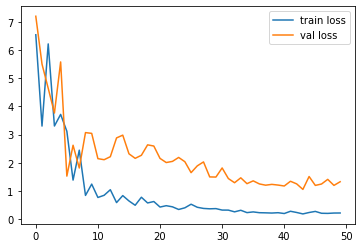

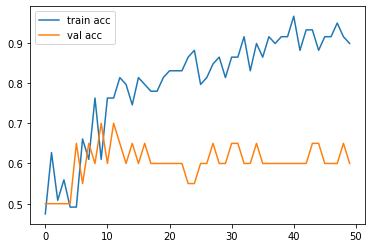

<Figure size 432x288 with 0 Axes>

In [77]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [78]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\archi\Anacondaa\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [79]:
y_pred = model.predict(test_set)


In [80]:
y_pred


array([[9.56976712e-01, 4.30233516e-02],
       [8.57987404e-01, 1.42012626e-01],
       [9.98771846e-01, 1.22810912e-03],
       [2.50843406e-01, 7.49156654e-01],
       [3.30435306e-01, 6.69564724e-01],
       [9.97341573e-01, 2.65845004e-03],
       [5.02973460e-02, 9.49702680e-01],
       [9.62186337e-01, 3.78136225e-02],
       [8.96896482e-01, 1.03103556e-01],
       [9.77271676e-01, 2.27282774e-02],
       [2.94185519e-01, 7.05814481e-01],
       [1.93898723e-01, 8.06101322e-01],
       [5.89017153e-01, 4.10982847e-01],
       [6.94310367e-02, 9.30568933e-01],
       [9.99906898e-01, 9.31510876e-05],
       [9.99998450e-01, 1.51859683e-06],
       [1.00000000e+00, 6.72376599e-09],
       [8.13713610e-01, 1.86286315e-01],
       [9.83500957e-01, 1.64990593e-02],
       [9.99963522e-01, 3.64457846e-05]], dtype=float32)

In [107]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0)

In [111]:
y_pred

0

In [112]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [113]:
model=load_model('model_resnet50.h5')

In [26]:
img=image.load_img('Dataset/Test/WithMask/1.jpg',target_size=(224,224))


In [27]:
x=image.img_to_array(img)
x

array([[[236., 240., 241.],
        [236., 240., 241.],
        [236., 240., 241.],
        ...,
        [231., 233., 232.],
        [231., 233., 232.],
        [231., 233., 232.]],

       [[236., 240., 241.],
        [236., 240., 241.],
        [236., 240., 241.],
        ...,
        [231., 233., 232.],
        [231., 233., 232.],
        [231., 233., 232.]],

       [[237., 241., 242.],
        [237., 241., 242.],
        [237., 241., 242.],
        ...,
        [231., 233., 232.],
        [231., 233., 232.],
        [231., 233., 232.]],

       ...,

       [[240., 233., 241.],
        [240., 234., 238.],
        [240., 234., 234.],
        ...,
        [ 20.,  25.,  54.],
        [ 20.,  25.,  54.],
        [ 21.,  26.,  55.]],

       [[242., 233., 238.],
        [242., 233., 236.],
        [239., 234., 230.],
        ...,
        [ 19.,  23.,  50.],
        [ 18.,  22.,  49.],
        [ 18.,  22.,  49.]],

       [[242., 233., 238.],
        [242., 233., 236.],
        [239., 2

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255
x

array([[[0.9254902 , 0.9411765 , 0.94509804],
        [0.9254902 , 0.9411765 , 0.94509804],
        [0.9254902 , 0.9411765 , 0.94509804],
        ...,
        [0.90588236, 0.9137255 , 0.9098039 ],
        [0.90588236, 0.9137255 , 0.9098039 ],
        [0.90588236, 0.9137255 , 0.9098039 ]],

       [[0.9254902 , 0.9411765 , 0.94509804],
        [0.9254902 , 0.9411765 , 0.94509804],
        [0.9254902 , 0.9411765 , 0.94509804],
        ...,
        [0.90588236, 0.9137255 , 0.9098039 ],
        [0.90588236, 0.9137255 , 0.9098039 ],
        [0.90588236, 0.9137255 , 0.9098039 ]],

       [[0.92941177, 0.94509804, 0.9490196 ],
        [0.92941177, 0.94509804, 0.9490196 ],
        [0.92941177, 0.94509804, 0.9490196 ],
        ...,
        [0.90588236, 0.9137255 , 0.9098039 ],
        [0.90588236, 0.9137255 , 0.9098039 ],
        [0.90588236, 0.9137255 , 0.9098039 ]],

       ...,

       [[0.9411765 , 0.9137255 , 0.94509804],
        [0.9411765 , 0.91764706, 0.93333334],
        [0.9411765 , 0

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[0.97190946, 0.02809054]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data),axis=1)
a

array([0], dtype=int64)